In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Text Mining/obat_sirup.csv')

In [4]:
data.to_csv('new_file_before_preprocessing.csv', index=False)

In [5]:
data['content'].head()

0    Ini Bahaya Dietilen Glikol dan Etilen Glikol p...
1    Uzbekistan Konfirmasi 18 Anak Meninggal Usai M...
2    BPOM menambah daftar 176 obat sirup dari 49 in...
3    BPOM menambah daftar 176 obat sirup dari 49 in...
4    BPOM menambah daftar 176 obat sirup dari 49 in...
Name: content, dtype: object

In [6]:
data.dropna(subset = ["content"], inplace=True)

data.to_csv('new_content_file_before_preprocessing.csv', index=False)

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
datanew = data.content.str.cat(sep='')
print (datanew)

Ini Bahaya Dietilen Glikol dan Etilen Glikol pada Obat Sirup https://t.co/33woB0K58hUzbekistan Konfirmasi 18 Anak Meninggal Usai Minum Obat Batuk Sirup Asal India, Mengandung Zat Beracun Etilen Glikol #LengkapCepatBeritanya #BeritaTerkini #International #BeritaInternasional . https://t.co/a99BdjYkVGBPOM menambah daftar 176 obat sirup dari 49 industri farmasi yang bebas cemaran etilen glikol dan dietilen glikol (EG-DEG). Berikut adalah daftar obatnya...  https://t.co/JBiuz5t1XiBPOM menambah daftar 176 obat sirup dari 49 industri farmasi yang bebas cemaran etilen glikol dan dietilen glikol (EG-DEG). Berikut adalah daftar obatnya...  https://t.co/tPK9M2LXpuBPOM menambah daftar 176 obat sirup dari 49 industri farmasi yang bebas cemaran etilen glikol dan dietilen glikol (EG-DEG). Berikut adalah daftar obatnya... https://t.co/uv7OYunAQNOleh karena itu, diharapkan kepada seluruh masyarakat untuk tidak memberikan obat sirup pada anak tanpa konsultasi dengan tenaga kesehatan karena dugaan cemar

In [10]:
#tokenize words
words = nltk.tokenize.word_tokenize(datanew)

#count word
word_dist = nltk.FreqDist(words)

#menampilkan 10 kata pertama dengan frequensi terbanyak
top_N = 100

#menampilkan kata dalam table dan menghitung frequensi nya - include stopwords
print("Word Frequency before remove stopword")
print('All frequency, includeing STOPWORDS:')
print('='*60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns = ['Word', 'Frequency']).set_index('Word')

print(rslt)
print('='*60)

Word Frequency before remove stopword
All frequency, includeing STOPWORDS:
            Frequency
Word                 
:                1061
https             957
.                 922
obat              838
Glikol            743
...               ...
!                  43
tentang            42
-                  42
memberikan         40
merilis            40

[100 rows x 1 columns]


<Figure size 21600x21600 with 0 Axes>

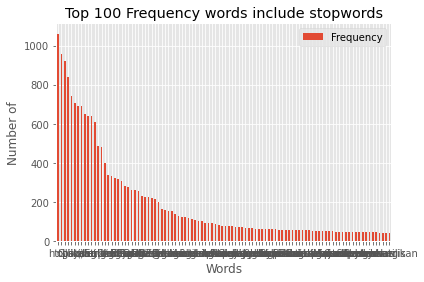

<Figure size 21600x21600 with 0 Axes>

In [11]:
import matplotlib
import matplotlib.pyplot as plt

#print plotnya
matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

#label for x
plt.xlabel('Words')
plt.ylabel('Number of')

#x axis label rotation 
plt.title('Top 100 Frequency words include stopwords')

plt.figure(figsize=(300,300))

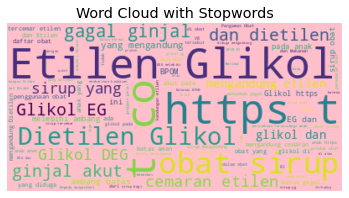

<Figure size 432x288 with 0 Axes>

In [12]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(background_color="pink").generate(datanew)

#display the generated image with stopword:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud with Stopwords')
plt.axis("off")
plt.show()
plt.savefig('wordcloud with stopwords.jpg')